<a href="https://colab.research.google.com/github/deedeebles/Hamoye1/blob/master/Hamoye_Stage1_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import files
uploaded = files.upload()

Saving fuel_ferc1.csv to fuel_ferc1.csv


In [4]:
import io
dataset = pd.read_csv(io.BytesIO(uploaded['fuel_ferc1.csv']))
dataset

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570
...,...,...,...,...,...,...,...,...,...,...,...
29518,f1_fuel_2018_12_12_0_13,12,2018,neil simpson ct #1,gas,mcf,18799.0,1.059,4.78,4.78,9.030
29519,f1_fuel_2018_12_12_1_1,12,2018,cheyenne prairie 58%,gas,mcf,806730.0,1.050,3.65,3.65,6.950
29520,f1_fuel_2018_12_12_1_10,12,2018,lange ct facility,gas,mcf,104554.0,1.060,4.77,4.77,8.990
29521,f1_fuel_2018_12_12_1_13,12,2018,wygen 3 bhp 52%,coal,ton,315945.0,16.108,3.06,14.76,1.110


In [5]:
dataset.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [6]:
dataset.groupby("fuel_unit")["fuel_unit"].count()

fuel_unit
bbl        7998
gal          84
gramsU      464
kgU         110
mcf       11354
mmbtu       180
mwdth        95
mwhth       100
ton        8958
Name: fuel_unit, dtype: int64

In [7]:
dataset[["fuel_unit"]]= dataset[["fuel_unit"]].fillna(value='mcf')

In [8]:
dataset.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

In [9]:
dataset.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [10]:
dataset.duplicated().any()

False

In [11]:
df= dataset.corr()
df

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
utility_id_ferc1,1.000000,0.093323,-0.057447,-0.066946,-0.037863,-0.016414,0.006122
report_year,0.093323,1.000000,0.012952,-0.110853,0.013599,-0.014043,0.010261
fuel_qty_burned,-0.057447,0.012952,1.000000,-0.080946,-0.018535,-0.003551,-0.001896
fuel_mmbtu_per_unit,-0.066946,-0.110853,-0.080946,1.000000,-0.010034,-0.009039,-0.005884
fuel_cost_per_unit_burned,-0.037863,0.013599,-0.018535,-0.010034,1.000000,0.011007,-0.000437
fuel_cost_per_unit_delivered,-0.016414,-0.014043,-0.003551,-0.009039,0.011007,1.000000,-0.000109
fuel_cost_per_mmbtu,0.006122,0.010261,-0.001896,-0.005884,-0.000437,-0.000109,1.000000


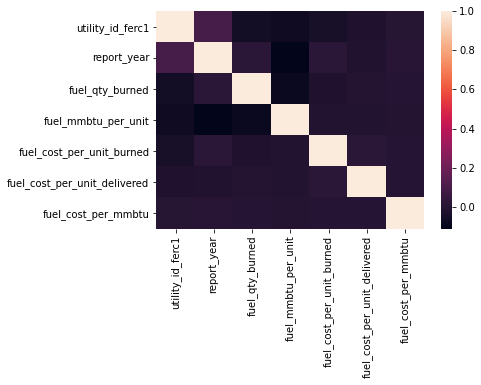

In [12]:
sns.heatmap(df)

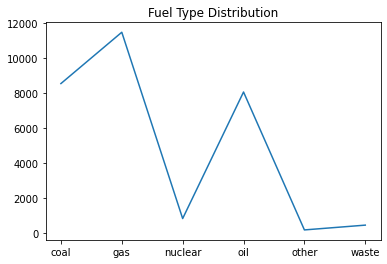

In [13]:
fuel_type=dataset.groupby("fuel_type_code_pudl")["fuel_type_code_pudl"].count()
plt.plot(fuel_type)
plt.title("Fuel Type Distribution")
plt.show()



Text(0.5, 1.0, 'Fuel Cost Versus Different Generation Sources')

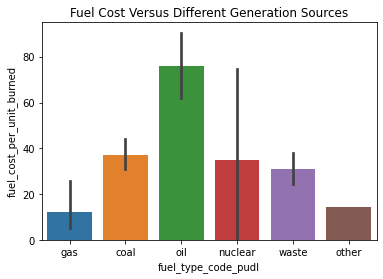

In [14]:
df2 = dataset.sample(n=100, random_state=0)
sns.barplot(x=df2["fuel_type_code_pudl"], y=df2["fuel_cost_per_unit_burned"])
plt.title("Fuel Cost Versus Different Generation Sources")

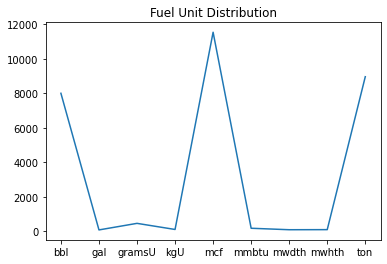

In [15]:
fuel_unit=dataset.groupby("fuel_unit")["fuel_unit"].count()
plt.plot(fuel_unit)
plt.title("Fuel Unit Distribution")
plt.show()

Text(0.5, 1.0, 'Measure of Energy For Fuel Burned')

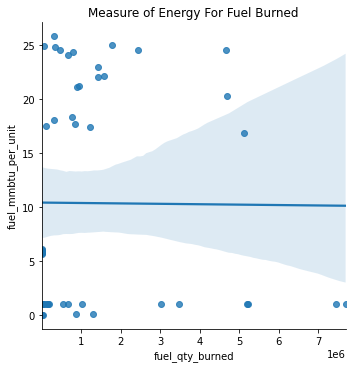

In [16]:
df2 = dataset.sample(n=50, random_state=0)
sns.lmplot("fuel_qty_burned","fuel_mmbtu_per_unit",df2)
plt.title("Measure of Energy For Fuel Burned")

Text(0.5, 1.0, 'Cost of Fuel Unit Delivered Versus Burned')

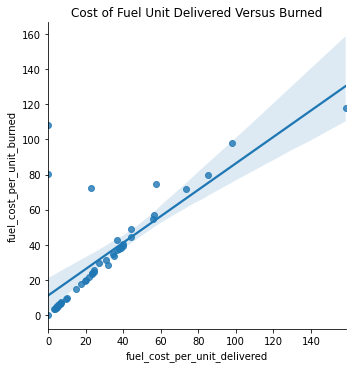

In [17]:
df2 = dataset.sample(n=50, random_state=0)
sns.lmplot("fuel_cost_per_unit_delivered","fuel_cost_per_unit_burned",df2)
plt.title("Cost of Fuel Unit Delivered Versus Burned")

Text(0.5, 1.0, 'Cost of Fuel Burned')

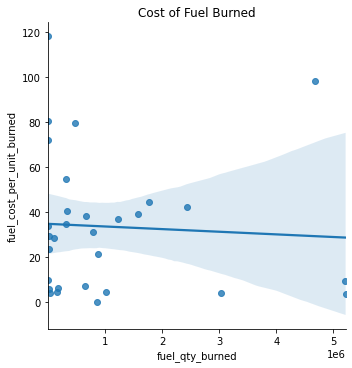

In [18]:
df2 = dataset.sample(n=30, random_state=0)
sns.lmplot("fuel_qty_burned","fuel_cost_per_unit_burned",df2)
plt.title("Cost of Fuel Burned")

Text(0.5, 1.0, 'Fuel Unit Versus Cost Per Unit Delivered')

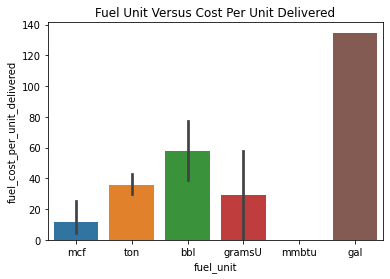

In [19]:
df2 = dataset.sample(n=100, random_state=0)
sns.barplot(x=df2["fuel_unit"], y=df2["fuel_cost_per_unit_delivered"])
plt.title("Fuel Unit Versus Cost Per Unit Delivered")

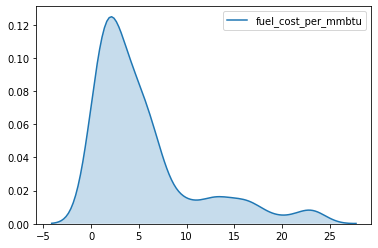

In [21]:
df2 = dataset.sample(n=100, random_state=0)
sns.kdeplot(df2['fuel_cost_per_mmbtu'],shade=True)